<a href="https://colab.research.google.com/github/NicoSammur/prediccion-stock-chile-ml/blob/main/Predict_CMPC_SN_with_SVR_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Predict CMPC.SN using support vector regression for an specific day
# nicolas _@_ ipv4.cl

In [2]:
# Libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [3]:
#Load data
from google.colab import files
files.upload()

Saving CMPC.SN.csv to CMPC.SN.csv


{'CMPC.SN.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2014-01-02,1280.859985,1316.609985,1279.859985,1287.430054,1233.353394,1722956\n2014-01-03,1287.430054,1309.739990,1283.839966,1298.880005,1244.322632,1302245\n2014-01-06,1304.760010,1304.859985,1285.839966,1297.890015,1243.374023,1200382\n2014-01-07,1297.890015,1304.760010,1279.959961,1285.239990,1231.255615,1516728\n2014-01-08,1285.239990,1293.800049,1276.869995,1291.310059,1237.070557,2359522\n2014-01-09,1291.310059,1294.800049,1279.859985,1282.150024,1228.295532,1018148\n2014-01-10,1282.150024,1289.819946,1269.900024,1283.150024,1229.253296,968915\n2014-01-13,1283.150024,1289.819946,1270.599976,1282.150024,1228.295532,828668\n2014-01-14,1282.150024,1284.839966,1274.880005,1277.469971,1223.811768,639613\n2014-01-15,1277.469971,1294.800049,1277.170044,1290.219971,1236.026367,983954\n2014-01-16,1290.219971,1293.800049,1274.880005,1275.479980,1221.905518,441133\n2014-01-17,1275.479980,1276.869995,1269.900024,1271.099976,1217.

In [6]:
# Store data
df = pd.read_csv('CMPC.SN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,1280.859985,1316.609985,1279.859985,1287.430054,1233.353394,1722956
1,2014-01-03,1287.430054,1309.739990,1283.839966,1298.880005,1244.322632,1302245
2,2014-01-06,1304.760010,1304.859985,1285.839966,1297.890015,1243.374023,1200382
3,2014-01-07,1297.890015,1304.760010,1279.959961,1285.239990,1231.255615,1516728
4,2014-01-08,1285.239990,1293.800049,1276.869995,1291.310059,1237.070557,2359522
...,...,...,...,...,...,...,...
1748,2021-01-11,2039.900024,2048.000000,2005.000000,2039.900024,2039.900024,264066
1749,2021-01-12,2120.000000,2120.000000,2039.000000,2120.000000,2120.000000,228911
1750,2021-01-13,2120.000000,2140.000000,2065.000000,2120.000000,2120.000000,956422
1751,2021-01-14,2120.000000,2130.000000,2066.899902,2120.000000,2120.000000,371023


In [7]:
# Rows 
df.shape 

(1753, 7)

In [8]:
# Print the last row of data to confirm how the model adapts later 
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
1752,2021-01-15,2090.0,2124.0,2080.0,2090.0,2090.0,205747


In [9]:
# Prepare data for training the 3 different models
# Get all data except last row to compare
df = df.head(len(df)-1)
print(df)

            Date         Open         High  ...        Close    Adj Close   Volume
0     2014-01-02  1280.859985  1316.609985  ...  1287.430054  1233.353394  1722956
1     2014-01-03  1287.430054  1309.739990  ...  1298.880005  1244.322632  1302245
2     2014-01-06  1304.760010  1304.859985  ...  1297.890015  1243.374023  1200382
3     2014-01-07  1297.890015  1304.760010  ...  1285.239990  1231.255615  1516728
4     2014-01-08  1285.239990  1293.800049  ...  1291.310059  1237.070557  2359522
...          ...          ...          ...  ...          ...          ...      ...
1747  2021-01-08  2048.899902  2048.899902  ...  2048.899902  2048.899902   631113
1748  2021-01-11  2039.900024  2048.000000  ...  2039.900024  2039.900024   264066
1749  2021-01-12  2120.000000  2120.000000  ...  2120.000000  2120.000000   228911
1750  2021-01-13  2120.000000  2140.000000  ...  2120.000000  2120.000000   956422
1751  2021-01-14  2120.000000  2130.000000  ...  2120.000000  2120.000000   371023

[17

In [10]:
# Create empty list to store the independent and dependent data
days = list()
adj_close_prices = list()

In [12]:
# Get the dates and adjusted close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [13]:
# Create the independent data set
for day in df_days:
  days.append([int(day.split('-')[1])])
# Create the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append( float(adj_close_price) )


In [14]:
# Print the days and the adj close prices
print(days)
print(adj_close_prices)

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10]

In [15]:
# Create and train 3 SVR models

# Create and train SVR using a lineal kernel
lin_svr = SVR(kernel='linear', C=1.0)
lin_svr.fit(days, adj_close_prices)

# Create and train SVR using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

# Create and train SVR using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1.0, gamma = 0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

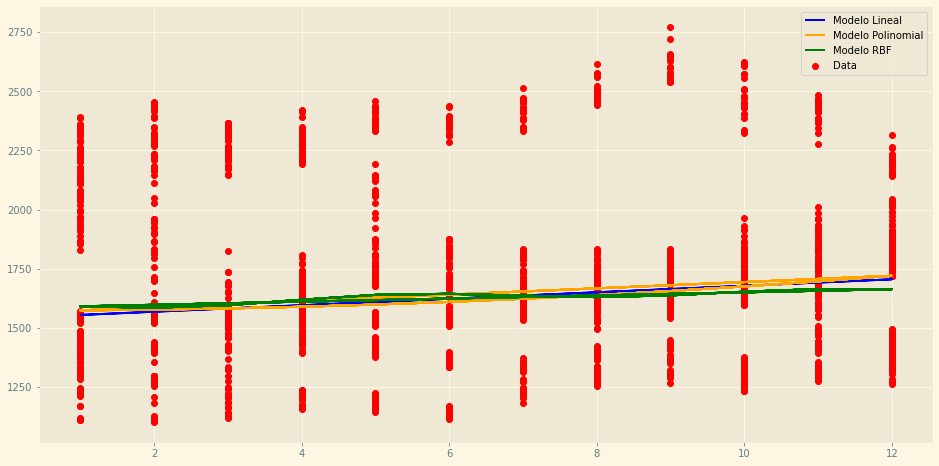

In [16]:
# Plot model to see which has the best fit on original df COPEC.SN 
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'red', label = 'Data')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Modelo Lineal')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Modelo Polinomial')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'Modelo RBF')
plt.legend()
plt.show()

In [17]:
# Show predicted file (to confirm last date)
day = [[31]]
print('Linear SVR predicted: ', lin_svr.predict(day))
print('Polynomial SVR predicted: ', poly_svr.predict(day))
print('RBF SVR predicted: ', rbf_svr.predict(day))

Linear SVR predicted:  [1965.266701]
Polynomial SVR predicted:  [2555.49109696]
RBF SVR predicted:  [1629.80519886]


In [18]:
# Print the actual price of the stock on day 31
print('Actual CMPC.SN is: ', actual_price['Adj Close'][1752])

Actual CMPC.SN is:  2090.0
